<a href="https://colab.research.google.com/github/mattmorganpdx/AdventOfCode2022/blob/main/AoC_2022_Day_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part 1

import re
from operator import mul
from functools import reduce

class Monkey():
  def __init__(self, items, op, test, true, flase, *args, **kwargs) -> None:
    self.items = items
    self.op = self._get_op(op)
    self.test = int(test)
    self.true = int(true)
    self.false = int(false)
    self.inspect_count = 0
    self.lcm = 0

  def _get_op(self, op):
    o, v = op.split()
    if o == '+':
      return lambda x: x + (int(v) if v != "old" else x)
    return lambda x: x * (int(v) if v != "old" else x)

  def throw_next(self):
    if not self.items:
      return
    self.inspect_count += 1
    n = self.items.pop(0)
    nn = self.op(n) // 3
    
    return (self.true, nn) if nn % self.test == 0 else (self.false, nn)

  def catch(self, item):
    self.items.append(item)


monkeys = []

for m in input.split('\n\n'):
  lines = m.splitlines()
  items = [int(i) for i in re.findall('\d+', lines[1])]
  op, = re.findall('(?:\= old )(.*)', lines[2])
  test, = re.findall('(?:by )(\d+)', lines[3])
  true, = re.findall('(?:monkey )(\d+)', lines[4])
  false, = re.findall('(?:monkey )(\d+)', lines[5])
  monkeys.append(Monkey(items, op, test, true, false))


lcm = reduce(mul, (m.test for m in monkeys))
for m in monkeys:
  m.lcm = lcm

print(lcm)

for c in range(20):
  for monkey in monkeys:
    while n := monkey.throw_next():
      monkeys[n[0]].catch(n[1])

t, s = sorted(m.inspect_count for m in monkeys)[-2:]

# Part 1 answer
print(t * s)

print([m.inspect_count for m in monkeys])

9699690
78960
[280, 133, 152, 5, 137, 282, 276, 150]


In [33]:
# Part 1

import re
from operator import mul
from functools import reduce

class Monkey():
  def __init__(self, items, op, test, true, flase, *args, **kwargs) -> None:
    self.items = items
    self.op = self._get_op(op)
    self.test = int(test)
    self.true = int(true)
    self.false = int(false)
    self.inspect_count = 0
    self.lcm = 0

  def _get_op(self, op):
    o, v = op.split()
    if o == '+':
      return lambda x: x + (int(v) if v != "old" else x)
    return lambda x: x * (int(v) if v != "old" else x)

  def throw_next(self):
    if not self.items:
      return
    self.inspect_count += 1
    n = self.items.pop(0)
    nn = self.op(n) // 3
    
    return (self.true, nn) if nn % self.test == 0 else (self.false, nn)

  def catch(self, item):
    self.items.append(item)


monkeys = []

for m in test_input.split('\n\n'):
  lines = m.splitlines()
  items = [int(i) for i in re.findall('\d+', lines[1])]
  op, = re.findall('(?:\= old )(.*)', lines[2])
  test, = re.findall('(?:by )(\d+)', lines[3])
  true, = re.findall('(?:monkey )(\d+)', lines[4])
  false, = re.findall('(?:monkey )(\d+)', lines[5])
  monkeys.append(Monkey(items, op, test, true, false))


lcm = reduce(mul, (m.test for m in monkeys))
for m in monkeys:
  m.lcm = lcm

print(lcm)

test_ds = []

for c in range(300):
  for monkey in monkeys:
    while n := monkey.throw_next():
      monkeys[n[0]].catch(n[1])
  test_ds.append(monkeys[0].inspect_count)

t, s = sorted(m.inspect_count for m in monkeys)[-2:]

# Part 1 answer
print(t * s)

print([m.inspect_count for m in monkeys])

96577
2664924
[1621, 1375, 32, 1644]


In [34]:
[(i,x) for i,x in enumerate(test_ds) if x % 10 == 0]

[(13, 70),
 (21, 110),
 (23, 120),
 (25, 130),
 (38, 200),
 (51, 270),
 (60, 320),
 (69, 370),
 (80, 430),
 (82, 440),
 (93, 500),
 (113, 610),
 (126, 680),
 (128, 690),
 (148, 800),
 (185, 1000),
 (187, 1010),
 (207, 1120),
 (218, 1180),
 (220, 1190),
 (242, 1310),
 (251, 1360),
 (253, 1370),
 (262, 1420),
 (264, 1430),
 (286, 1550),
 (295, 1600),
 (297, 1610)]

In [35]:
import pandas as pd
df = pd.DataFrame(test_ds)
df['growth'] = df[0].diff()
df['growth rate'] = df[0].pct_change()

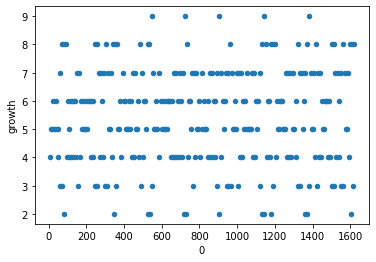

In [41]:
df.plot.scatter(y='growth', x=0)

In [12]:
import data_patterns

ModuleNotFoundError: ignored

In [1]:
test_input = '''Monkey 0:
  Starting items: 79, 98
  Operation: new = old * 19
  Test: divisible by 23
    If true: throw to monkey 2
    If false: throw to monkey 3

Monkey 1:
  Starting items: 54, 65, 75, 74
  Operation: new = old + 6
  Test: divisible by 19
    If true: throw to monkey 2
    If false: throw to monkey 0

Monkey 2:
  Starting items: 79, 60, 97
  Operation: new = old * old
  Test: divisible by 13
    If true: throw to monkey 1
    If false: throw to monkey 3

Monkey 3:
  Starting items: 74
  Operation: new = old + 3
  Test: divisible by 17
    If true: throw to monkey 0
    If false: throw to monkey 1'''

In [ ]:
input = '''Monkey 0:
  Starting items: 54, 82, 90, 88, 86, 54
  Operation: new = old * 7
  Test: divisible by 11
    If true: throw to monkey 2
    If false: throw to monkey 6

Monkey 1:
  Starting items: 91, 65
  Operation: new = old * 13
  Test: divisible by 5
    If true: throw to monkey 7
    If false: throw to monkey 4

Monkey 2:
  Starting items: 62, 54, 57, 92, 83, 63, 63
  Operation: new = old + 1
  Test: divisible by 7
    If true: throw to monkey 1
    If false: throw to monkey 7

Monkey 3:
  Starting items: 67, 72, 68
  Operation: new = old * old
  Test: divisible by 2
    If true: throw to monkey 0
    If false: throw to monkey 6

Monkey 4:
  Starting items: 68, 89, 90, 86, 84, 57, 72, 84
  Operation: new = old + 7
  Test: divisible by 17
    If true: throw to monkey 3
    If false: throw to monkey 5

Monkey 5:
  Starting items: 79, 83, 64, 58
  Operation: new = old + 6
  Test: divisible by 13
    If true: throw to monkey 3
    If false: throw to monkey 0

Monkey 6:
  Starting items: 96, 72, 89, 70, 88
  Operation: new = old + 4
  Test: divisible by 3
    If true: throw to monkey 1
    If false: throw to monkey 2

Monkey 7:
  Starting items: 79
  Operation: new = old + 8
  Test: divisible by 19
    If true: throw to monkey 4
    If false: throw to monkey 5'''